<a href="https://colab.research.google.com/github/micaelaperillo/Sentiment_Analysis_Debate/blob/main/Analyze_and_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Sentiment analysis of Debate 2023 - 2

The output of the [previous part](https://colab.research.google.com/drive/1Y1q5mCUp_py3-9Lzm015H9ysb-jTVH6B?usp=sharing) can be found [here](https://drive.google.com/drive/folders/1KV0F5a6_rk9Z6f3U-BYsYgkJ3svumJD0?usp=drive_link).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sentiment analysis in 'Introduccion'

In [ ]:
# Load data
df = pd.read_csv('/content/ejes_tematicos.csv')

introduccion = df[df['Categoria'] == 'Introduccion']

# Maximum joy, sadness and anger registered
max_joy = introduccion['Joy'].max()
max_sadness = introduccion['Sadness'].max()
max_anger = introduccion['Anger'].max()

# Candidate with maximum joy, sadness and anger registered
candidate_with_max_joy = introduccion.loc[introduccion['Joy'].idxmax(), 'Candidato']
candidate_with_max_sadness = introduccion.loc[introduccion['Sadness'].idxmax(), 'Candidato']
candidate_with_max_anger = introduccion.loc[introduccion['Anger'].idxmax(), 'Candidato']

print(f"The maximum joy for 'Introduccion' is: {max_joy}")
print(f"The candidate with the maximum joy for 'Introduccion' is: {candidate_with_max_joy}")
print("-----")
print(f"The maximum sadness for 'Introduccion' is: {max_sadness}")
print(f"The candidate with the maximum sadness for 'Introduccion' is: {candidate_with_max_sadness}")
print("-----")
print(f"The maximum anger for 'Introduccion' is: {max_anger}")
print(f"The candidate with the maximum anger for 'Introduccion' is: {candidate_with_max_anger}")

The maximum joy for 'Introduccion' is: 0.5902424454689026
The candidate with the maximum joy for 'Introduccion' is: Sergio Massa
-----
The maximum sadness for 'Introduccion' is: 0.9095829725265504
The candidate with the maximum sadness for 'Introduccion' is: Patricia Bullrich
-----
The maximum anger for 'Introduccion' is: 0.8176741003990173
The candidate with the maximum anger for 'Introduccion' is: Juan Schiaretti


## Sentiment analysis of the first part of the Debate

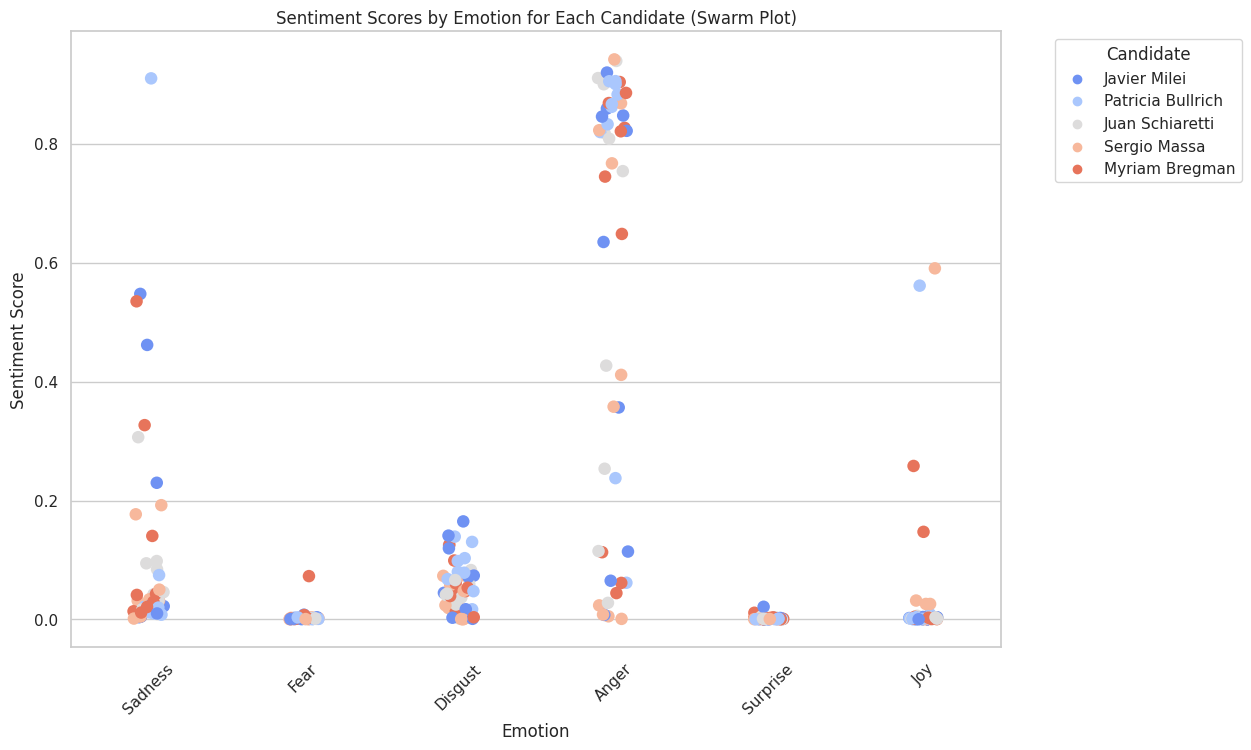

In [ ]:
# Load data
df = pd.read_csv('/content/ejes_tematicos.csv')

sentiment_cols = ['Sadness', 'Fear', 'Disgust', 'Anger', 'Surprise', 'Joy']
candidate_cols = ['Candidato', 'Categoria', 'Intervencion', 'Replica a']

df_melted = df.melt(id_vars=candidate_cols, value_vars=sentiment_cols, var_name='Emotion', value_name='Sentiment Score')
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.stripplot(x='Emotion', y='Sentiment Score', hue='Candidato', data=df_melted, palette='coolwarm', size=9)
plt.title('Sentiment Scores by Emotion for Each Candidate (Swarm Plot)')
plt.xlabel('Emotion')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.legend(title='Candidate', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Sentiment analysis for each question of the second part

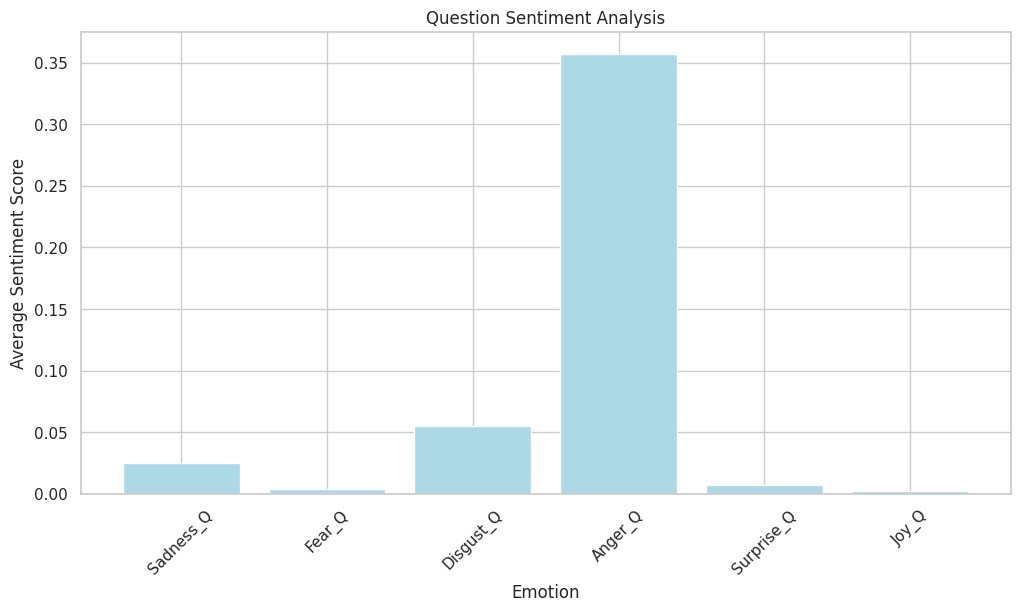

In [ ]:
# Load data
df = pd.read_csv('/content/qna.csv')

# Sentiment columns for questions
sentiment_cols = ['Sadness_Q', 'Fear_Q', 'Disgust_Q', 'Anger_Q', 'Surprise_Q', 'Joy_Q']

# Bar chart for question sentiments
plt.figure(figsize=(12, 6))
plt.bar(sentiment_cols, df[sentiment_cols].mean(), color='lightblue')
plt.title('Question Sentiment Analysis')
plt.xlabel('Emotion')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)

plt.show()

In [ ]:
# Top 3 most angry questions
most_angry_questions = df.nlargest(3, 'Anger_Q')

for index, row in most_angry_questions.iterrows():
    print(f"Candidate: {row['Candidato Pregunta']} to Candidate: {row['Candidato Respuesta']}")
    print(f"Question: {row['Pregunta']}")
    print(f"Anger Score: {row['Anger_Q']}")
    print("\n")

print("-----\n")

# Top 3 most disgust questions
most_disgust_questions = df.nlargest(3, 'Disgust_Q')

for index, row in most_disgust_questions.iterrows():
    print(f"Candidate: {row['Candidato Pregunta']} to Candidate: {row['Candidato Respuesta']}")
    print(f"Question: {row['Pregunta']}")
    print(f"Disgust Score: {row['Disgust_Q']}")
    print("\n")

Candidate: Patricia Bullrich to Candidate: Myriam Bregman
Question: Los países socialistas tienen ejércitos fuertes, con la bota bien puesta.
Ahora, acá en la Argentina, ¿por qué odiás tanto a la Fuerza de Seguridad y a las Fuerzas Armadas?
¿Por qué las odiás tanto?
¿Por qué no los reconocés como trabajadores?
Anger Score: 0.9379647374153136


Candidate: Sergio Massa to Candidate: Myriam Bregman
Question: Miriam, votaste con nosotros 24 leyes en el último año y solo dos con la libertad de avanza.
Y el domingo pasado no fuiste clara con tus electores.
¿De verdad para vos es lo mismo Milei que nosotros?
Anger Score: 0.8640806078910828


Candidate: Myriam Bregman to Candidate: Javier Milei
Question: Usted niega el cambio climático, niega el genocidio, niega los 30.000 detenidos desaparecidos, niega el patriarcado, ¿niega también los femicidios?
Anger Score: 0.8178238272666931


-----

Candidate: Patricia Bullrich to Candidate: Sergio Massa
Question: Los bolsos de López, los hoteles de Cri

## Sentiment analysis for each answer of the second part

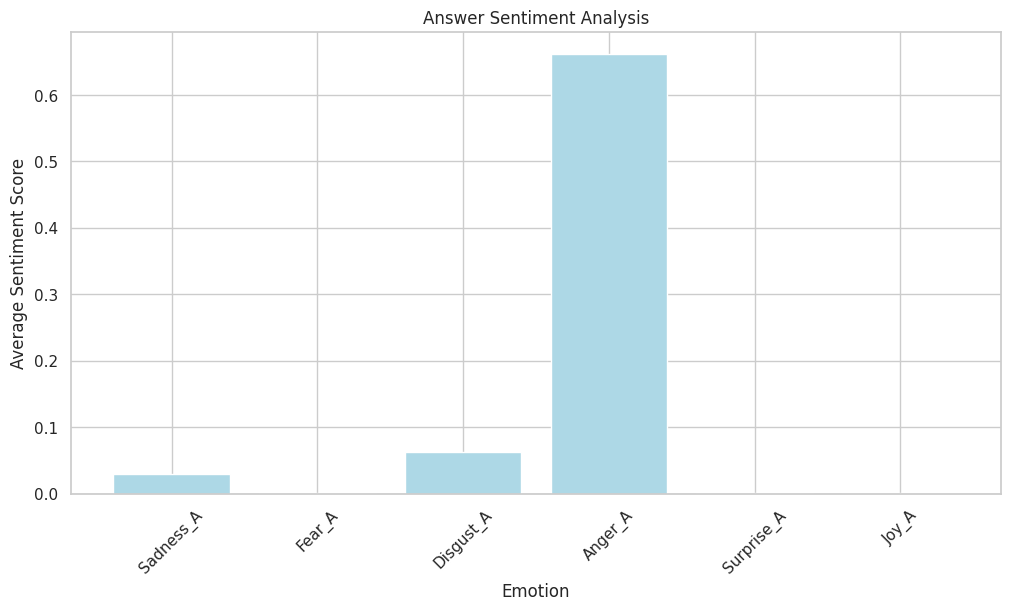

In [ ]:
# Bar chart for answer sentiments
plt.figure(figsize=(12, 6))
sentiment_cols = ['Sadness_A', 'Fear_A', 'Disgust_A', 'Anger_A', 'Surprise_A', 'Joy_A']
plt.bar(sentiment_cols, df[sentiment_cols].mean(), color='lightblue')
plt.title('Answer Sentiment Analysis')
plt.xlabel('Emotion')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Top 3 most angry answers
most_angry_answers = df.nlargest(3, 'Anger_A')

for index, row in most_angry_answers.iterrows():
    print(f"Candidate: {row['Candidato Respuesta']} to Candidate: {row['Candidato Pregunta']}")
    print(f"Answer: {row['Respuesta']}")
    print(f"Anger Score: {row['Anger_A']}")
    print("\n")

print("-----\n")

# Top 3 most disgust answers
most_disgust_answers = df.nlargest(3, 'Disgust_A')

for index, row in most_disgust_answers.iterrows():
    print(f"Candidate: {row['Candidato Respuesta']} to Candidate: {row['Candidato Pregunta']}")
    print(f"Answer: {row['Respuesta']}")
    print(f"Disgust Score: {row['Disgust_A']}")
    print("\n")

Candidate: Patricia Bullrich to Candidate: Sergio Massa
Answer: Massa, la inflación que generaste es producto del gasto fiscal brutal, de que metés a los ñoquis de la cámpora adentro, los dejás en planta permanente, que inventás todos planes que lo único que hacen es aumentar el gasto.
¿Y sabés cómo aumentás el gasto?
Haciendo pomada a las empresas, a las pymes, a los que trabajan, al salario de la gente, que cayó un 30%.
Entonces no me vengas con plancitos que lo que llevan a los chicos de vacaciones a Bariloche.
Vamos por 46 millones de argentinos, a bajarle la inflación, a no tener más déficit, a tener un país ordenado, a que la gente pueda tener crédito.
Dejate de joder con esos plancitos.
Vamos en serio nosotros, juntos por el cambio, a cambiar la Argentina.
Anger Score: 0.9372231960296632


Candidate: Javier Milei to Candidate: Myriam Bregman
Answer: A ver, primero no mienta.
Yo no niego el cambio climático.
 Lo que yo digo es que existe en la historia de la Tierra un ciclo de te

## Mentions of Cordoba by Candidate

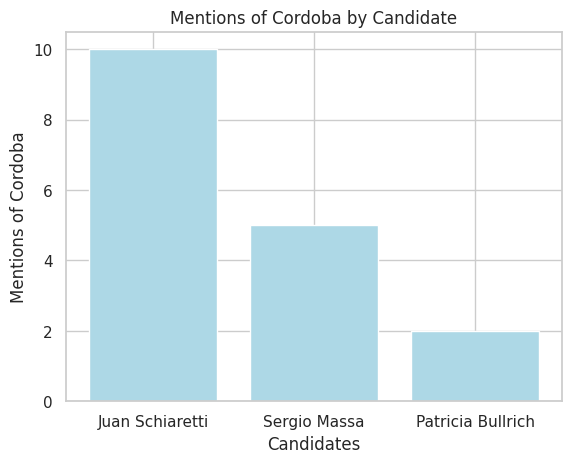

In [ ]:
df1 = pd.read_csv('/content/ejes_tematicos.csv')
df2 = pd.read_csv('/content/qna.csv')

candidate_mentions = {}

for index, row in df1.iterrows():
    candidate = row['Candidato']
    intervention = row['Intervencion']

    if 'Córdoba' in intervention:
        if candidate in candidate_mentions:
            candidate_mentions[candidate] += 1
        else:
            candidate_mentions[candidate] = 1

for index, row in df2.iterrows():
    candidato_pregunta = row['Candidato Pregunta']
    candidato_respuesta = row['Candidato Respuesta']
    pregunta = row['Pregunta']
    respuesta = row['Respuesta']

    if 'Córdoba' in pregunta:
        if candidato_pregunta in candidate_mentions:
            candidate_mentions[candidato_pregunta] += 1
        else:
            candidate_mentions[candidato_pregunta] = 1

    if 'Córdoba' in respuesta:
        if candidato_respuesta in candidate_mentions:
            candidate_mentions[candidato_respuesta] += 1
        else:
            candidate_mentions[candidato_respuesta] = 1

candidates = list(candidate_mentions.keys())
mentions = list(candidate_mentions.values())

plt.bar(candidates, mentions, color='lightblue')

plt.xlabel('Candidates')
plt.ylabel('Mentions of Cordoba')
plt.title('Mentions of Cordoba by Candidate')

plt.show()